<a href="https://colab.research.google.com/github/ibtehaaj/Deep-Learning/blob/master/Concrete_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.keras.backend.clear_session()  # For easy reset of notebook state.
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
# if tf.__version__ < "2.0.0":
#   !pip install --upgrade tensorflow_gpu==2.0

In [25]:
from google.colab import files
uploaded = files.upload()
import io

Saving compresive_strength_concrete.csv to compresive_strength_concrete (2).csv


In [26]:
pd.read_csv(io.BytesIO(uploaded["compresive_strength_concrete.csv"]))
dataset = pd.read_csv('compresive_strength_concrete.csv') 
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [27]:
dataset.isnull().sum().sum()  #dataset did'nt contains any null values

0

In [28]:
data = dataset.values
data

array([[540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  79.99],
       [540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  61.89],
       [332.5 , 142.5 ,   0.  , ..., 594.  , 270.  ,  40.27],
       ...,
       [148.5 , 139.4 , 108.6 , ..., 780.  ,  28.  ,  23.7 ],
       [159.1 , 186.7 ,   0.  , ..., 788.9 ,  28.  ,  32.77],
       [260.9 , 100.5 ,  78.3 , ..., 761.5 ,  28.  ,  32.4 ]])

In [0]:
x = data[:,:-1]
y = data[:,-1:]

In [0]:
# splitting into test train and validation data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

(206, 8)

In [0]:
# normalizing dataset
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /=std
x_test -= mean  
x_test /= std

In [0]:
x_val = x_train[724:]
y_val = y_train[724:]
#validation data
partial_x_train = x_train[:724]
partial_y_train = y_train[:724]

In [0]:
# defining the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10,activation='relu',input_dim=8),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [0]:
# compiling the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [35]:
history = model.fit(partial_x_train,partial_y_train,epochs=200,batch_size=80,validation_data=(x_val, y_val))

Train on 724 samples, validate on 100 samples
Epoch 1/200
724/724 [==============================] - 0s 665us/sample - loss: 1566.8013 - mae: 35.7657 - val_loss: 1546.8246 - val_mae: 36.1150
Epoch 2/200
724/724 [==============================] - 0s 47us/sample - loss: 1562.1952 - mae: 35.6979 - val_loss: 1543.2898 - val_mae: 36.0623
Epoch 3/200
724/724 [==============================] - 0s 45us/sample - loss: 1558.9872 - mae: 35.6505 - val_loss: 1540.4100 - val_mae: 36.0201
Epoch 4/200
724/724 [==============================] - 0s 40us/sample - loss: 1556.2786 - mae: 35.6104 - val_loss: 1537.6850 - val_mae: 35.9809
Epoch 5/200
724/724 [==============================] - 0s 41us/sample - loss: 1553.7272 - mae: 35.5721 - val_loss: 1534.8030 - val_mae: 35.9389
Epoch 6/200
724/724 [==============================] - 0s 42us/sample - loss: 1550.7447 - mae: 35.5280 - val_loss: 1531.3404 - val_mae: 35.8886
Epoch 7/200
724/724 [==============================] - 0s 45us/sample - loss: 1547.0508 -

In [39]:
model.evaluate(x_test,y_test)

206/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[68.70270419815212, 6.2785034]

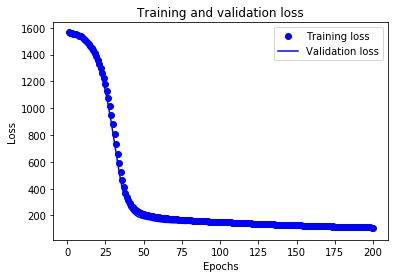

In [37]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [38]:
model.fit(x_train,y_train,batch_size=10,epochs=25)

Train on 824 samples
Epoch 1/25
824/824 [==============================] - 0s 167us/sample - loss: 107.0657 - mae: 8.1682
Epoch 2/25
824/824 [==============================] - 0s 148us/sample - loss: 104.9286 - mae: 8.0294
Epoch 3/25
824/824 [==============================] - 0s 147us/sample - loss: 102.0536 - mae: 7.9288
Epoch 4/25
824/824 [==============================] - 0s 146us/sample - loss: 100.3370 - mae: 7.8731
Epoch 5/25
824/824 [==============================] - 0s 148us/sample - loss: 98.8585 - mae: 7.7598
Epoch 6/25
824/824 [==============================] - 0s 148us/sample - loss: 96.2955 - mae: 7.6915
Epoch 7/25
824/824 [==============================] - 0s 155us/sample - loss: 95.5417 - mae: 7.6340
Epoch 8/25
824/824 [==============================] - 0s 161us/sample - loss: 93.6650 - mae: 7.5547
Epoch 9/25
824/824 [==============================] - 0s 171us/sample - loss: 91.8768 - mae: 7.4548
Epoch 10/25
824/824 [==============================] - 0s 149us/sample - lo